In [1]:
# The code was removed by Watson Studio for sharing.

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers
0,1,1,1,Pilot,Ken Kwapis,Ricky Gervais & Stephen Merchant and Greg Daniels,2005-03-24,1001,11200000.0
1,1,2,2,Diversity Day,Ken Kwapis,B. J. Novak,2005-03-29,1002,6000000.0
2,1,3,3,Health Care,Ken Whittingham,Paul Lieberstein,2005-04-05,1006,5800000.0
3,1,4,4,The Alliance,Bryan Gordon,Michael Schur,2005-04-12,1004,5400000.0
4,1,5,5,Basketball,Greg Daniels,Greg Daniels,2005-04-19,1005,5000000.0


In [2]:
body = client_2e1f06cbe27b456499fc38ec81c09e8b.get_object(Bucket='imdbdata-donotdelete-pr-hn3effehtslsar',Key='the_office_imdb.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()


,season,episode_num,title,original_air_date,imdb_rating,total_votes,desc
0,1,1,Pilot,2005-03-24,7.4,7006,The premiere episode introduces the boss and s...
1,1,2,Diversity Day,2005-03-29,8.3,6902,Michael's off color remark puts a sensitivity ...
2,1,3,Health Care,2005-04-05,7.7,5756,Michael leaves Dwight in charge of picking the...
3,1,4,The Alliance,2005-04-12,8.0,5579,"Just for a laugh, Jim agrees to an alliance wi..."
4,1,5,Basketball,2005-04-19,8.4,6183,Michael and his staff challenge the warehouse ...


In [3]:
!pip install -U sqlalchemy==1.3.9 
!pip install -U ibm_db_sa 
!pip install -U ipython-sql 
!pip install -U ibm-db 
import ibm_db

     |████████████████████████████████| 6.0 MB 32.3 MB/s eta 0:00:01
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.9-cp38-cp38-linux_x86_64.whl size=1209510 sha256=9a05f909101b48d6deadf0add15d0e41322212c7bd29a5c067ab647c27eb559e
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/cb/43/46/fa638f2422554332b7865d600275b24568bf60e76104a94bb4
Successfully built sqlalchemy
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.4.22
    Uninstalling SQLAlchemy-1.4.22:
      Successfully uninstalled SQLAlchemy-1.4.22
     |████████████████████████████████| 42 kB 4.1 MB/s  eta 0:00:01
  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13700 sha256=6db9867ec99841448fde1d3136c1d9eb2bead296c151a797a77096abcb96f0d2
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/48/6d/77/9517cb933af254f51a446f1a5ec9c2be3e45f17384940bce68
Successfully built prettytable
     |████████████████████████████████| 797 kB 31.1 MB/s eta 0:00:01
  Inst

In [4]:
%load_ext sql

In [5]:
%sql ibm_db_sa://nhy87814:17F78ArgrrTbqIql@54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32733/BLUDB?security=SSL

In [6]:
%%sql

/* finding the 10 most popular episodes from The Office */

select season, title as "top_10_episodes", imdb_rating from THE_OFFICE_IMDB order by imdb_rating desc limit 10;

 * ibm_db_sa://nhy87814:***@54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32733/BLUDB
Done.


season,top_10_episodes,imdb_rating
7,"Goodbye, Michael",9.8
9,Finale,9.8
5,Stress Relief,9.7
4,Dinner Party,9.5
9,A.A.R.M.,9.5
6,Niagara: Part 2,9.5
2,Casino Night,9.4
7,Threat Level Midnight,9.4
6,Niagara: Part 1,9.4
4,"Goodbye, Toby",9.4


In [7]:
%%sql

/* finding the 10 least popular episodes from The Office */

select season, title as "bottom_10_episodes", imdb_rating from THE_OFFICE_IMDB order by imdb_rating asc limit 10;

 * ibm_db_sa://nhy87814:***@54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32733/BLUDB
Done.


season,bottom_10_episodes,imdb_rating
8,Get the Girl,6.4
6,The Banker,6.8
8,Angry Andy,6.8
8,Gettysburg,6.8
9,Here Comes Treble,6.9
8,Welcome Party,7.0
8,Fundraiser,7.0
9,Roy's Wedding,7.1
8,Lotto,7.2
9,Couples Discount,7.2


In [8]:
%%sql

/* finding the most popular episode per season */

select i.season, i.title, i.imdb_rating 
from (
   select season, max(imdb_rating) as mostpopular
   from THE_OFFICE_IMDB group by season
) as x inner join THE_OFFICE_IMDB as i on i.season = x.season and i.imdb_rating = x.mostpopular order by season;

 * ibm_db_sa://nhy87814:***@54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32733/BLUDB
Done.


season,title,imdb_rating
1,Basketball,8.4
2,Casino Night,9.4
3,The Job,9.3
4,Dinner Party,9.5
5,Stress Relief,9.7
6,Niagara: Part 2,9.5
7,"Goodbye, Michael",9.8
8,The List,8.1
8,The Incentive,8.1
8,Garden Party,8.1


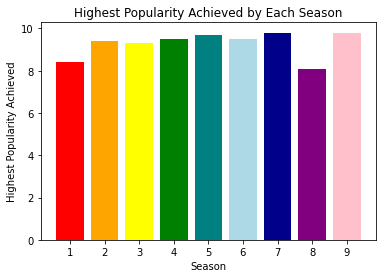

In [9]:
#plotting the highest popularity achieved for each season 
import matplotlib.pyplot as plt

season = ["1","2","3","4","5","6","7","8","9"]
maxpopularity = [8.4,9.4,9.3,9.5,9.7,9.5,9.8,8.1,9.8]
newcolors = ['red','orange','yellow','green','teal','lightblue','darkblue','purple','pink']

plt.bar(season, maxpopularity,color = newcolors)
plt.title('Highest Popularity Achieved by Each Season')
plt.xlabel('Season')
plt.ylabel('Highest Popularity Achieved')
plt.show()

In [10]:
%%sql

/* finding the average rating per season */

select season, round(float(avg(imdb_rating)),1) as average_rating from THE_OFFICE_IMDB group by season;

 * ibm_db_sa://nhy87814:***@54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32733/BLUDB
Done.


season,average_rating
1,7.9
2,8.4
3,8.6
4,8.6
5,8.5
6,8.2
7,8.3
8,7.6
9,7.9


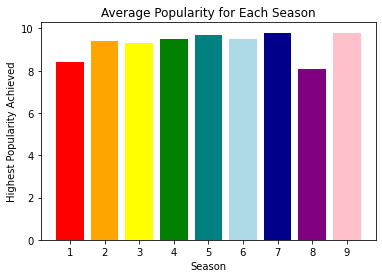

In [12]:
#plotting the average popularity for each season 
import matplotlib.pyplot as plt

season = ["1","2","3","4","5","6","7","8","9"]
avgpopularity = [7.9,8.4,8.6,8.6,8.5,8.2,8.3,7.6,7.9]
newcolors = ['red','orange','yellow','green','teal','lightblue','darkblue','purple','pink']

plt.bar(season, maxpopularity,color = newcolors)
plt.title('Average Popularity for Each Season')
plt.xlabel('Season')
plt.ylabel('Highest Popularity Achieved')
plt.show()

In [26]:
%%sql

/* returning the title, rating, and viewer count for each episode */

select distinct i.title, i.imdb_rating, int(e.us_viewers) as us_viewers from THE_OFFICE_IMDB i, THE_OFFICE_EPISODES e where i.title = e.title order by us_viewers desc; 

 * ibm_db_sa://nhy87814:***@54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32733/BLUDB
Done.


title,imdb_rating,us_viewers
Stress Relief,9.7,22910000
Pilot,7.4,11200000
The Injury,9.1,10300000
The Return,8.8,10200000
Traveling Salesmen,8.6,10120000
Ben Franklin,8.0,10110000
Chair Model,8.0,9810000
Fun Run,8.8,9700000
Christmas Party,8.9,9700000
Niagara: Part 1,9.4,9420000


0.30930027731885057


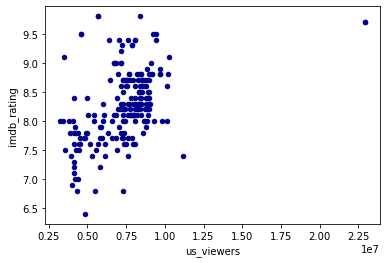

In [25]:
#finding the correlation between IMDb rating and US viewer count and using a scatterplot to visualize the relationship between the two variables

df = df_data_1.merge(df_data_2, on='title')

df.plot.scatter(x='us_viewers', y='imdb_rating', c = 'DarkBlue')
usviewers = df_data_1["us_viewers"]
imdbrating = df_data_2["imdb_rating"]
correlation_viewerrating = usviewers.corr(imdbrating)
print(correlation_viewerrating)

In [30]:
%%sql

/* finding the outlier in the scatterplot */

select distinct i.season, i.episode_num, i.title, i.imdb_rating, int(e.us_viewers) as us_viewers from THE_OFFICE_IMDB i, THE_OFFICE_EPISODES e where i.title = e.title and e.us_viewers > 22500000; 

 * ibm_db_sa://nhy87814:***@54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32733/BLUDB
Done.


season,episode_num,title,imdb_rating,us_viewers
5,13,Stress Relief,9.7,22910000


In [35]:
%%sql

/* deleting the outlier which was Season 5, Episode 13, titled Stress Relief, from the first dataset to perform further analysis */

delete from THE_OFFICE_EPISODES e where e.title = 'Stress Relief'


 * ibm_db_sa://nhy87814:***@54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32733/BLUDB
2 rows affected.


[]

In [36]:
%%sql

/* deleting the outlier which was Season 5, Episode 13, titled Stress Relief, from the first dataset to perform further analysis */

delete from THE_OFFICE_IMDB i where i.title = 'Stress Relief';

 * ibm_db_sa://nhy87814:***@54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32733/BLUDB
1 rows affected.


[]

0.4324884444288995


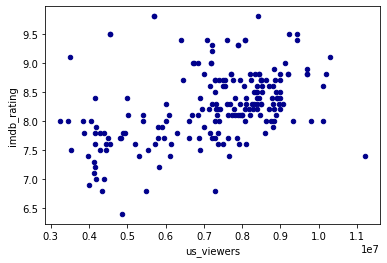

In [41]:
#redoing the scatterplot and correlation after deleting the outlier
#this resulted in a higher correlation among the variables, so the higher the US viewer count, the higher the IMDb rating on average

df = df_data_1.merge(df_data_2, on='title')
df.drop(df.index[df["title"] == "Stress Relief"], inplace = True)
df.plot.scatter(x='us_viewers', y='imdb_rating', c = 'DarkBlue')
usviewers = df["us_viewers"]
imdbrating = df["imdb_rating"]
correlation_viewerrating = usviewers.corr(imdbrating)
print(correlation_viewerrating)

<AxesSubplot:xlabel='original_air_date'>

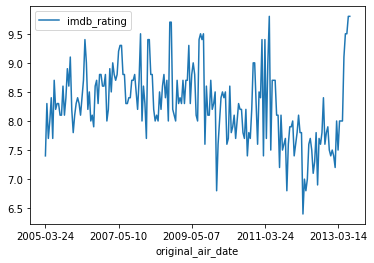

In [47]:
#plotting the time series of IMDb rating by air date

df.plot(x = 'original_air_date', y = 'imdb_rating')

<AxesSubplot:xlabel='original_air_date'>

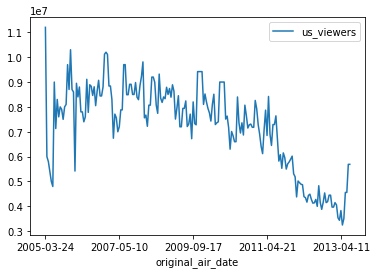

In [50]:
#plotting the time series of US viewer count by air date

df = df_data_1.merge(df_data_2, on='original_air_date')
df.drop(df.index[df["original_air_date"] == "2009-02-01"], inplace = True)
df.plot(x = 'original_air_date', y = 'us_viewers')

In [26]:
%%sql

/* finding the director with the most watched episodes */

select distinct e.season, e.title, e.directed_by, int(e.us_viewers)as us_viewers
from (
   select directed_by, avg(us_viewers) as mostviewers
   from THE_OFFICE_EPISODES group by directed_by
) as x inner join THE_OFFICE_EPISODES as e on e.directed_by = x.directed_by and e.us_viewers = x.mostviewers order by us_viewers desc;

 * ibm_db_sa://nhy87814:***@54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32733/BLUDB
Done.


season,title,directed_by,us_viewers
3,Grief Counseling,Roger Nygard,8830000
3,Diwali,Miguel Arteta,8810000
5,Prince Family Paper,Asaad Kelada,8740000
6,The Lover,Lee Eisenberg,8520000
4,Dunder Mifflin Infinity,Craig Zisk,8490000
5,Customer Survey,Stephen Merchant,8350000
3,Cocktails,J. J. Abrams,8300000
6,Koi Pond,Reggie Hudlin,8199999
5,Michael Scott Paper Company,Gene Stupnitsky,7940000
7,Christening,Alex Hardcastle,7650000


In [24]:
%%sql

/* finding the writer with the most watched episodes */

select distinct e.season, e.title, e.written_by, int(e.us_viewers)as us_viewers
from (
   select written_by, avg(us_viewers) as mostviewers
   from THE_OFFICE_EPISODES group by written_by
) as x inner join THE_OFFICE_EPISODES as e on e.written_by = x.written_by and e.us_viewers = x.mostviewers order by us_viewers desc;

 * ibm_db_sa://nhy87814:***@54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32733/BLUDB
Done.


season,title,written_by,us_viewers
1,Pilot,Ricky Gervais & Stephen Merchant and Greg Daniels,11200000
3,The Return,Lee Eisenberg & Gene Stupnitsky & Michael Schur,10200000
3,Traveling Salesmen,Michael Schur & Lee Eisenberg & Gene Stupnitsky,10120000
6,Niagara: Part 1,Greg Daniels & Mindy Kaling,9420000
6,Niagara: Part 2,Greg Daniels & Mindy Kaling,9420000
3,The Convict,Ricky Gervais & Stephen Merchant,9070000
3,Phyllis' Wedding,Caroline Williams,8840000
2,Performance Review,Larry Wilmore,8000000
3,The Job,Paul Lieberstein & Michael Schur,7880000
4,Did I Stutter?,Brent Forrester & Justin Spitzer,7670000
